In [11]:
import cv2
import pytesseract

In [12]:
def preprocess(img):
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #apply threshold
    threshold = cv2.threshold(gray, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return threshold

In [13]:
def extract_text(img):
    return pytesseract.image_to_string(img)

In [14]:
import google.generativeai as genai
from dotenv import load_dotenv
import os
load_dotenv()
genai.configure(api_key=os.getenv("API_KEY"))
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content("Explain how AI works")

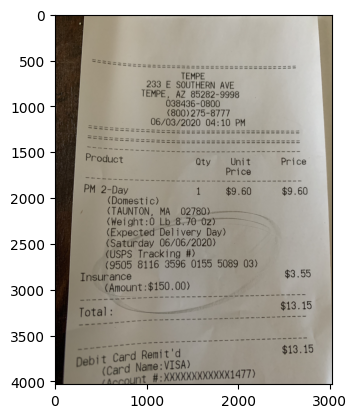

In [15]:
# image before preporcess
import matplotlib.pyplot as plt
image = plt.imread("test2.jpg")
plt.imshow(image)

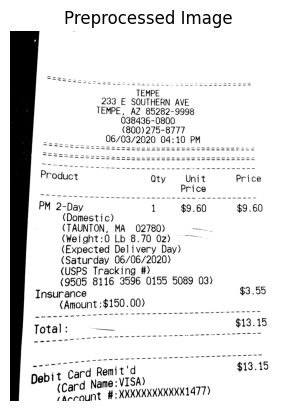

In [16]:

# Preprocess the image
_, processed_img = preprocess('test2.jpg')

# Plot the image
plt.imshow(processed_img, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

In [17]:
# extraction of the text from the image
extracted_text = extract_text(processed_img)
print(extracted_text)

TEMPE
233 E SOUTHERN AVE
TEMPE, AZ 85282-9998
038436-0800
(800) 275-8777
one. _ 06/03/2020 04: 10 PM
Product Qty Unit Price
Price
PM 2-Day | 1 £9.60 $9.60
(Domestic)

(TAUNTON, MA 02780) ee
(Weight:0 Lb 8.70 02) ~~ -
(Expected Delivery Day)
(Saturday 06/06/2020)

(USPS Tracking #)
(9505 8116 3596 0155 5089 03) $3.5
3.55

Insurance
(Amount :$150. 00)
fotal: $13.15

—_ om
a ee eee
—_
-
—_ om”
-_~— —_
_ -_-

Deb!” VISA
me
(Card Name KXKXKKXXK1477)

ryaccount



In [18]:
import json
def ai_extract(text):
    prompt = """ You are a reciept parser AI. I am going to provide you with text from a reciept and I want you to extract the following information in the this structure: {'total','bussiness','items':[{'name','price','quantity'}],'address'}"""
    response = model.generate_content(prompt + text)
    response_text = response.text.strip().replace("```json","").strip().replace("```","")
    try:
        response_json = json.loads(response_text)
    except json.JSONDecodeError as e:
        print(f"error Decoding JSON {e}")
        response_json = {"error": "Failed to parse AI response"}
    return response_json


In [19]:
print(ai_extract(extracted_text))

{'total': '$13.15', 'business': 'USPS', 'items': [{'name': 'PM 2-Day | 1 (Domestic)', 'price': '$9.60', 'quantity': 1}, {'name': 'Insurance', 'price': '$3.55', 'quantity': 1}], 'address': '233 E SOUTHERN AVE\nTEMPE, AZ 85282-9998'}
